In [86]:
import numpy as np  #for mathematical calculation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

In [6]:
# loading the dataset to a pandas dataframe
credit_card_data= pd.read_csv('/content/drive/MyDrive/creditcard1.csv')

**For checking each and every column**

In [7]:
pd.options.display.max_columns = None

**1. Display Top 5 Rows of the Dataset**

In [8]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Display Last 5 Rows of the Dataset**

In [9]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**3. Find shape of our Dataset (Number of Rows and Number of Columns)**

In [10]:
credit_card_data.shape

(284807, 31)

In [11]:
print("Number of Rows: ",credit_card_data.shape[0])
print("Number of Columns: ",credit_card_data.shape[1])


Number of Rows:  284807
Number of Columns:  31


**Get information About Our Dataset**

In [12]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Checking Null Values in the Dataset**

In [13]:
credit_card_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Handle Missing Values**
**1 Filling null values**

In [15]:
credit_card_data= credit_card_data.fillna(value=0)

In [16]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Checking the distribution of classes**

In [17]:
classes=credit_card_data['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [18]:
legit = round((classes[0]/credit_card_data['Class'].count()*100),2)
legit

99.83

In [19]:
fraud= round((classes[1]/credit_card_data['Class'].count()*100),2)
fraud

0.17

**Feature Scaling**

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

<Axes: xlabel='Class', ylabel='count'>

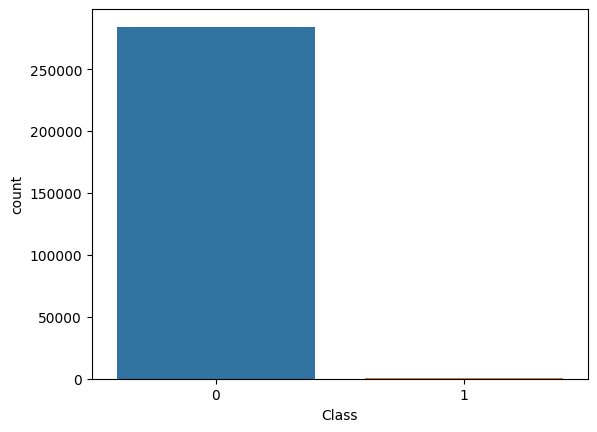

In [20]:
sns.countplot(x='Class',data=credit_card_data)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()
credit_card_data['Amount']=sc.fit_transform(pd.DataFrame(credit_card_data['Amount']))

In [23]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**Dropping time column because it is an external deciding factor**

In [24]:
credit_card_data=credit_card_data.drop(['Time'],axis=1)

In [25]:
credit_card_data.shape

(284807, 30)

In [26]:
credit_card_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**Check is our dataset contain any duplicate values if it is true then drop duplicated values**

In [27]:
credit_card_data.duplicated().any()

True

In [28]:
credit_card_data = credit_card_data.drop_duplicates()

In [29]:
credit_card_data.shape

(275663, 30)

**Handling imbalanced Dataset**

In [ ]:
#Undersampling
#Oversampling

**Undersampling**- we are randomly deleting rows from majority class to match them with minority class

In [35]:
#separating the data for analysis
legit =credit_card_data[credit_card_data.Class == 0]
fraud =credit_card_data[credit_card_data.Class == 1]

In [36]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [37]:
#statistical measures of data
legit.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [38]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction

we use undersampling


In [39]:
# Dealing with unbalanced data
legit_sample = legit.sample(n=473)

In [40]:
legit_sample.shape

(473, 30)

Concatenating to dataframes

In [41]:
new_data =pd.concat([legit_sample,fraud],ignore_index=True)

In [42]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [43]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.272078,-0.132790,2.036495,2.066125,0.050386,0.716299,0.224373,0.242718,0.109026,-0.130631,-1.346084,0.372316,0.158038,-0.924063,-1.945896,-0.067390,-0.061450,-0.701984,-1.493848,-0.361518,0.172904,0.920287,-0.120073,0.154179,-0.554032,-0.040344,0.273752,0.108513,0.305455,0
1,0.915081,-0.557340,1.104248,0.700868,-0.693213,1.052831,-0.742705,0.471940,0.740260,-0.278602,1.330877,1.575838,0.125841,-0.307059,-0.606673,-0.511297,0.355866,-0.940591,-0.232193,-0.000911,-0.058124,-0.018673,0.038879,-0.222868,0.061982,0.407781,0.027199,0.019506,-0.037740,0
2,-1.960348,0.480236,0.007364,-2.377022,0.824596,0.135334,-0.501056,-1.394636,0.716736,-0.797412,0.471709,1.002814,0.328354,0.466785,1.050662,-0.271044,-0.403125,0.251276,1.437140,-0.681165,1.386696,-0.764043,-0.539091,-1.290991,-0.266716,-0.151965,-0.256087,-0.448032,-0.347912,0
3,2.076812,-0.222751,-0.849704,0.080170,0.193216,0.323019,-0.442867,0.000076,1.139912,-0.206635,-1.581267,0.837332,1.645635,-0.383662,0.628414,0.476250,-1.041933,0.033786,0.341527,-0.080319,-0.244028,-0.512620,0.258771,-0.326463,-0.217093,-0.594636,0.037939,-0.032228,-0.333239,0
4,-4.700944,-11.926034,-5.124225,1.356565,-4.250200,-0.083714,4.285405,-0.978136,1.592396,-2.274092,0.743848,0.172657,-2.223159,1.780614,0.929001,-0.029581,-0.100838,1.324072,-0.058658,6.739673,2.188539,-1.529848,-2.937348,0.227284,-1.354195,-0.600129,-0.683200,0.537617,13.640072,0


In [44]:
x= new_data.drop('Class',axis=1)
y= new_data['Class']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# **Model Training**

**Logistic Regression**

In [46]:
model1= LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

**Model Evaluation**

In [47]:
x_test_pred1 = model1.predict(x_test)
x_train_pred1= model1.predict(x_train)


In [48]:
#accuracy on test data
accuracy_score(y_test,x_test_pred1)

0.9315789473684211

In [49]:
#precision on test data
precision_score(y_test,x_test_pred1)

0.9456521739130435

In [50]:
#recall on test data
recall_score(y_test,x_test_pred1)

0.9157894736842105

In [51]:
f1_score(y_test,x_test_pred1)

0.9304812834224598

**Decision Tree Classifier**

In [52]:
model2= DecisionTreeClassifier()
model2.fit(x_train, y_train)

DecisionTreeClassifier()

**Model Evaluation**

In [53]:
x_test_pred2 = model2.predict(x_test)
x_train_pred2= model2.predict(x_train)

In [54]:
#accuracy on test data
accuracy_score(y_test,x_test_pred2)

0.9210526315789473

In [55]:
#precision on test data
precision_score(y_test,x_test_pred2)

0.9347826086956522

In [56]:
#recall on test data
recall_score(y_test,x_test_pred2)

0.9052631578947369

In [57]:
f1_score(y_test,x_test_pred2)

0.9197860962566845

**Random Forest Classifier**

In [58]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
x_test_pred3 = model3.predict(x_test)
x_train_pred3= model3.predict(x_train)

In [60]:
#accuracy on test data
accuracy_score(y_test,x_test_pred3)

0.9473684210526315

In [61]:
#precision on test data
precision_score(y_test,x_test_pred3)

0.9885057471264368

In [62]:
#recall on test data
recall_score(y_test,x_test_pred3)

0.9052631578947369

In [63]:
f1_score(y_test,x_test_pred2)

0.9197860962566845

**Visiualizing results**

In [64]:
final_data =pd.DataFrame({'Models':['LR','DT','RF'],'Acc':[accuracy_score(y_test,x_test_pred1)*100,
                                               accuracy_score(y_test,x_test_pred2)*100,
                                               accuracy_score(y_test,x_test_pred3)*100,]})

In [65]:
final_data

,Models,Acc
0,LR,93.157895
1,DT,92.105263
2,RF,94.736842


<Axes: xlabel='Models', ylabel='Acc'>

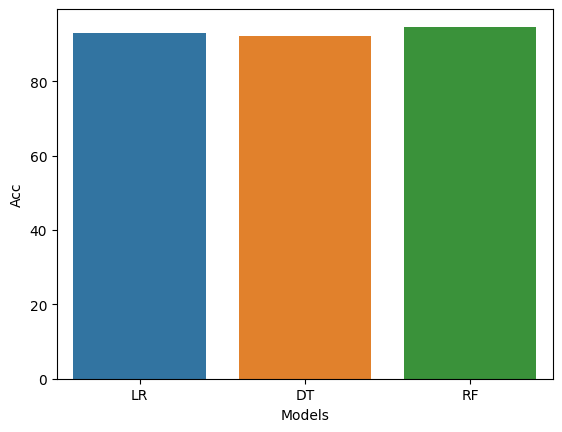

In [66]:
sns.barplot(x=final_data['Models'],y=final_data['Acc'])

**Oversampling**- we are  add valuable data in minority class to match them with majority class

In [32]:
x= credit_card_data.drop('Class',axis=1)
y= credit_card_data['Class']

In [33]:
x.shape

(275663, 29)

In [34]:
y.shape

(275663,)

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
x_res ,y_res =SMOTE().fit_resample(x,y)

In [37]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=2)

Logistic Regression

In [80]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_pred1= log.predict(x_test)

In [82]:
log_score=log.score(x_test,y_test)*100
print(log_score)

94.5056143028453


In [41]:
accuracy_score(y_test,y_pred1)

0.9450561430284531

In [42]:
precision_score(y_test,y_pred1)

0.9724666641048303

In [43]:
recall_score(y_test,y_pred1)

0.9164373144057362

In [44]:
f1_score(y_test,y_pred1)

0.9436210078863472

In [45]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred2= dt.predict(x_test)

In [83]:
dt_score=dt.score(x_test,y_test)*100
print(dt_score)

99.81103964533595


In [47]:
accuracy_score(y_test,y_pred2)

0.9981103964533595

In [48]:
precision_score(y_test,y_pred2)

0.9971626847869303

In [49]:
recall_score(y_test,y_pred2)

0.9990765553704642

In [50]:
f1_score(y_test,y_pred2)

0.9981187026283895

In [51]:
rd= RandomForestClassifier()
rd.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred3=rd.predict(x_test)

In [85]:
rd_score=rd.score(x_test,y_test)*100
print(rd_score)

99.99091536756423


In [53]:
accuracy_score(y_test,y_pred3)

0.9999091536756423

In [54]:
precision_score(y_test,y_pred3)

0.9998189652051124

In [55]:
recall_score(y_test,y_pred3)

1.0

In [56]:
f1_score(y_test,y_pred3)

0.9999094744084153

In [79]:
final_data =pd.DataFrame({'Models':['LR','DT','RF'],'Acc':[accuracy_score(y_test,y_pred1)*100,
                                               accuracy_score(y_test,y_pred2)*100,
                                               accuracy_score(y_test,y_pred3)*100,]})

In [58]:
final_data

,Models,Acc
0,LR,94.505614
1,DT,99.811040
2,RF,99.990915


<Axes: xlabel='Models', ylabel='Acc'>

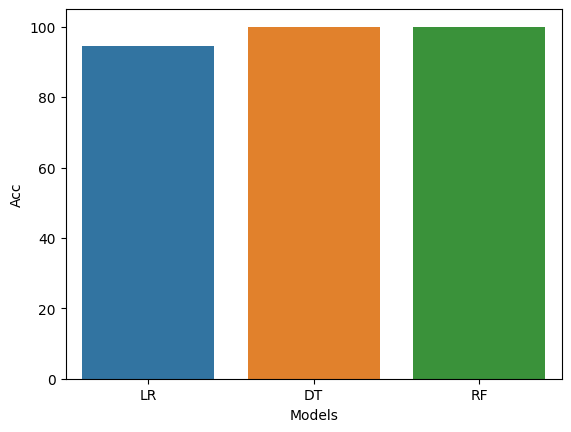

In [59]:
sns.barplot(x=final_data['Models'],y=final_data['Acc'])

Save the model

In [60]:
rd1= RandomForestClassifier()
rd1.fit(x_res,y_res)

RandomForestClassifier()

In [61]:
import joblib

In [63]:
joblib.dump(rd1,"Credit_card_model")

['Credit_card_model']

In [64]:
model=joblib.load("Credit_card_model")

In [70]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
if pred==0 :
  print("Normal Transaction")
else :
  print("Fradulent Transaction")

Normal Transaction
